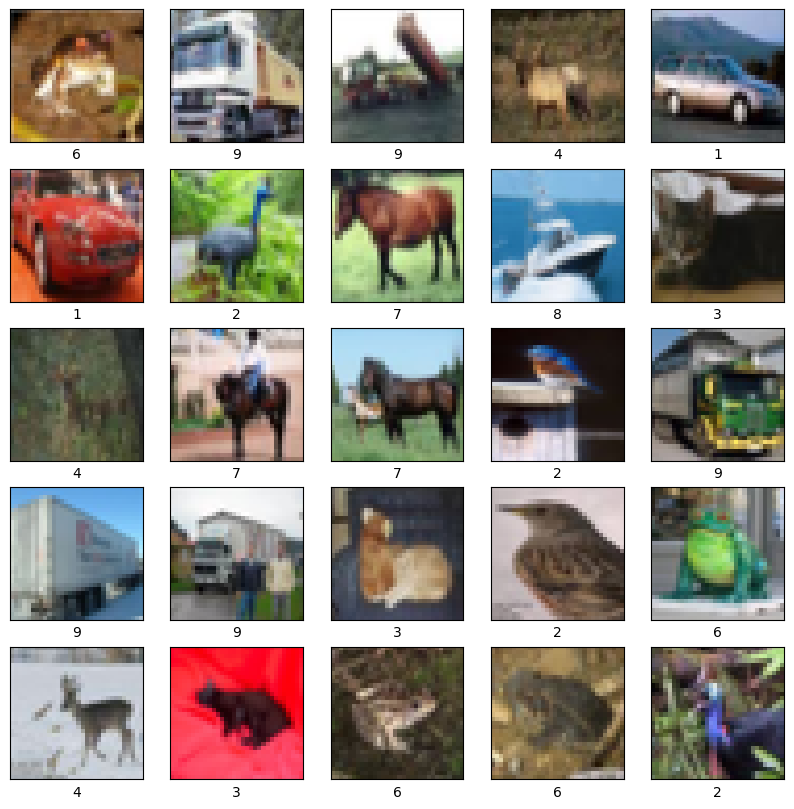

Epoch 1/10
1250/1250 [==============================] - 51s 40ms/step - loss: 1.4996 - accuracy: 0.4539 - val_loss: 1.2421 - val_accuracy: 0.5616
Epoch 2/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.1197 - accuracy: 0.6014 - val_loss: 1.0782 - val_accuracy: 0.6190
Epoch 3/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.9650 - accuracy: 0.6601 - val_loss: 0.9694 - val_accuracy: 0.6654
Epoch 4/10
1250/1250 [==============================] - 50s 40ms/step - loss: 0.8611 - accuracy: 0.6981 - val_loss: 0.9574 - val_accuracy: 0.6677
Epoch 5/10
1250/1250 [==============================] - 51s 41ms/step - loss: 0.7813 - accuracy: 0.7279 - val_loss: 0.9368 - val_accuracy: 0.6769
Epoch 6/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.7048 - accuracy: 0.7527 - val_loss: 0.9224 - val_accuracy: 0.6873
Epoch 7/10
1250/1250 [==============================] - 50s 40ms/step - loss: 0.6388 - accuracy: 0.7764 - val_loss: 0.9073 -

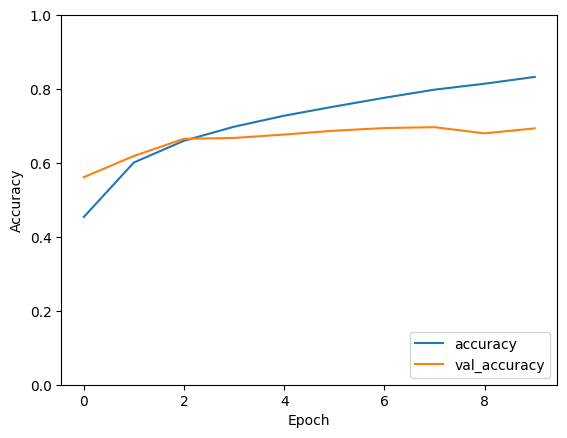

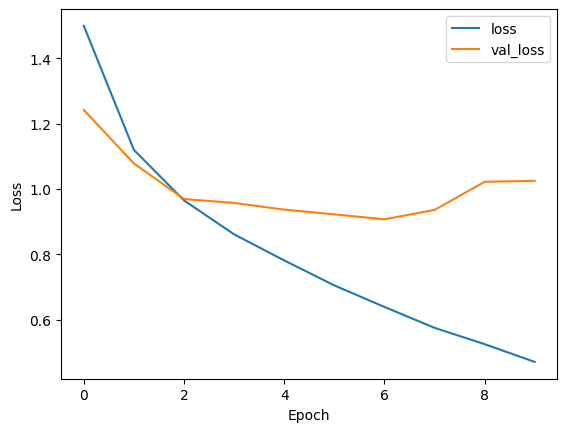

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.79      0.81      0.80      1000
           2       0.71      0.49      0.58      1000
           3       0.48      0.47      0.48      1000
           4       0.61      0.64      0.62      1000
           5       0.57      0.60      0.58      1000
           6       0.85      0.66      0.74      1000
           7       0.62      0.83      0.71      1000
           8       0.76      0.84      0.80      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



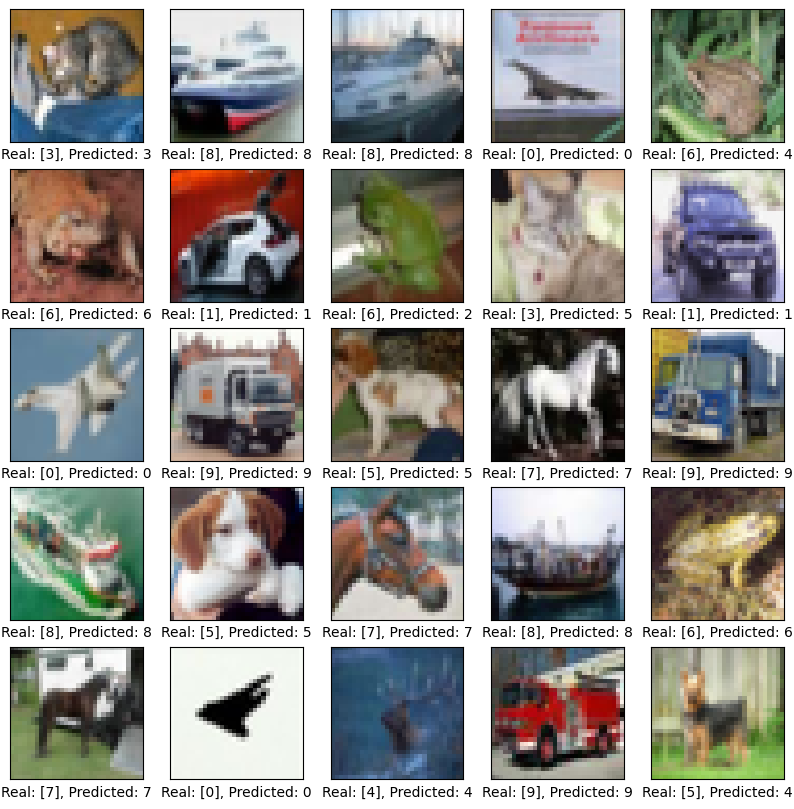

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Loading and downloading the data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Reshaping the y train
y_train = y_train.reshape(-1,)


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Visualizing the loss and accuarcy through the matplotlyb library
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = [tf.argmax(y, axis=-1).numpy() for y in y_pred]


print(classification_report(y_test, y_pred_classes))


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f'Real: {y_test[i]}, Predicted: {y_pred_classes[i]}')
plt.show()